In [2]:
"""Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков"""

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Признаем диапазон значений коээфициента корреляции: 
# r>0,01≤0,29 – слабая положительная связь,
# r>0,30≤0,69 – умеренная положительная связь,
# r>0,70≤1,00 – сильная положительная связь,
# r>-0,01≤-0,29 – слабая отрицательная связь,
# r>-0,30≤-0,69 – умеренная отрицательная связь,
# r>-0,70≤-1,00 – сильная отрицательная связь

# Считаем, что на выборке всех рассматриваемых городов между показателями имеется умеренная положительная взаимосвязь. 
# Ситуация меняется при анализе городов юга и севера в отдельности. И в том, и в другом регионах 
# знак связи меняется на отрицательную связь двух признаков, т.е. зависимость, если таковая существует, становится обратной. 
# Причем для юга это выражено больше, чем для севера. В первом случае, на первый взгляд,
# имеем умеренную отрицательную связь, во втором (на основании коэффициента Спирмена) - слабую отрицательную связь. 
# Для последнего по графику (положение стремится к горизонтальному) видно, что связь весьма слабо детерминирована. 

# Однако в реальности модель для юга непригодна к использованию. Исходим из следующего. 
# Примем, что влияние изучаемых факторов на результат описывается в той степени, 
# которую определяет коэффициент детерминации: при значениях выше 0,5 - в достаточной степени, ниже - в низкой степени. 
# Вывод исходя из расчета коэффициента: общая выборка по Англии и Уэльсу позволяет нам 
# умеренно принимать тесноту выявленной связи, 
# по суженным региональным выборкам - этого сказать нельзя. 
# Отрицательные значения коэффициента для юга говорят о том, что построенная модель хуже наивной. 
# В случае с севером значение коэффициента столь мало, 
# что модель лишь в незначительной степени описывает влияение указанного фактора жесткости воды на смертность. 

hardness_list = pd.read_csv('water.csv').head(61)
hardness_list_clear = hardness_list[['location', 'town', 'mortality', 'hardness']]
hardness_list_clear

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


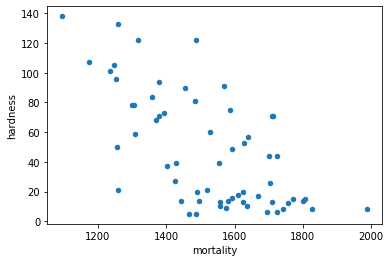

In [4]:
# Строим точечный график 

hardness_list_clear.plot(kind='scatter', x='mortality', y='hardness')

In [9]:
# Рассчитаем коэффициент корреляции Пирсона 

hardness_list_clear.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [12]:
# Рассчитаем коэффициент корреляции Спирмена

hardness_list_clear[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [22]:
# Построим модель линейной регрессии:
# изучаем связь жесткости воды и среднегодовой смертности 
# уравление регрессии принимает вид (расчет далее): y = -3.13167087 * x + 1668.97

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = hardness_list_clear[['hardness']]
y = hardness_list_clear['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) 
model.coef_
round(model.intercept_, 2)

1668.97

In [24]:
# Получим прогнозные значения

y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [26]:
# Рассчитаем коэффициент детерминации, демонстрирующий нам уровень ошибки прогноза
# получаем ошибку в половне случаев

model.score(X_test, y_test)

0.5046490611017092

mae: 105.84524344593149


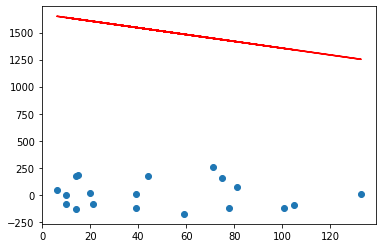

In [34]:
# Выведем график остатков (ошибок)
# для этого найдем разницу между y_test - y_pred

from sklearn.metrics import mean_absolute_error

# считаем абсолютную ошибку прогноза (также есть метод просчета среднеквадратич. ошибки: mse = mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)    
print(f'mae: {mae}')  

# Рассчитываем разницу между фактической величиной смертности и предсказанной:
diff_ = y_test - y_pred
diff_

# Строим графики: прогнозный тренд и рассеяние ошибок по их абсолютной величине 
plt.scatter(X_test, diff_)
plt.plot(X_test, y_pred, c='r')

In [39]:
"""2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности"""

region_filter = 'South'
hardness_list_south = hardness_list_clear.query('location == @region_filter')
hardness_list_south

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
18,South,East Ham,1318,122
19,South,Exeter,1260,21


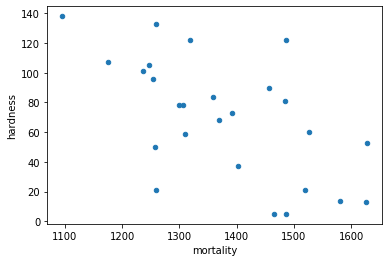

In [41]:
# Строим точечный график зависимости смертности и жесткости воды: визуально зависимость слаба 

hardness_list_south.plot(kind='scatter', x='mortality', y='hardness')

In [45]:
# Рассчитаем коэффициенты корреляции Пирсона и Спирмена для южного региона

print(hardness_list_south.corr())
print()
print(hardness_list_south[['mortality', 'hardness']].corr(method='kendall'))

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

           mortality  hardness
mortality   1.000000 -0.440315
hardness   -0.440315  1.000000


In [46]:
# Построим модель линейной регрессии, основанную на данных южного региона:
# изучаем связь жесткости воды и среднегодовой смертности в этой местности
# уравление регрессии принимает вид (расчет далее): y = -3.51342921 * x + 1640.22

X = hardness_list_south[['hardness']]
y = hardness_list_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) 
print(model.coef_)
print(round(model.intercept_, 2))

[-3.51342921]
1640.22


In [48]:
# вычислим прогнозные значения для юга,
# рассчитаем коэффициент детерминации, демонстрирующий нам уровень ошибки прогноза
# коэффициент детерминации носит отрицательное значение

y_pred = model.predict(X_test)
model.score(X_test, y_test)

-2.5519223012352077

mae: 154.63037398973606


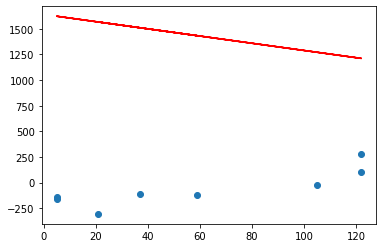

In [50]:
# Выведем график остатков (ошибок)
# для этого найдем разницу между y_test - y_pred


# считаем абсолютную ошибку прогноза 
mae = mean_absolute_error(y_test, y_pred)    
print(f'mae: {mae}')  

# Рассчитываем разницу между фактической величиной смертности и предсказанной:
diff_s = y_test - y_pred

# Строим графики: прогнозный тренд и рассеяние ошибок по их абсолютной величине 
plt.scatter(X_test, diff_s)
plt.plot(X_test, y_pred, c='r')

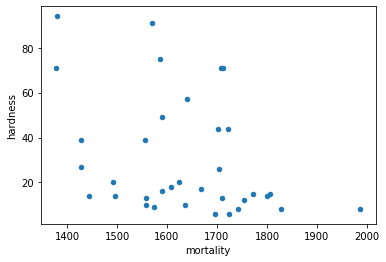

In [52]:
# Проведем расчеты для севера

region_filter = 'North'
hardness_list_north = hardness_list_clear.query('location == @region_filter')

# Построим точечный график 
hardness_list_north.plot(kind='scatter', x='mortality', y='hardness')

In [53]:
# Исчислим коэффициенты корреляции Пирсона и Спирмена для южного региона

print(hardness_list_north.corr())
print()
print(hardness_list_north[['mortality', 'hardness']].corr(method='kendall'))

           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

           mortality  hardness
mortality   1.000000 -0.283058
hardness   -0.283058  1.000000


In [54]:
# Построим модель линейной регрессии, основанную на данных северного региона:
# изучаем связь жесткости воды и среднегодовой смертности в этой местности
# уравление регрессии принимает вид (расчет далее): y = -1.97686226 * x + 1688.15

X = hardness_list_north[['hardness']]
y = hardness_list_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) 
print(model.coef_)
print(round(model.intercept_, 2))

[-1.97686226]
1688.15


In [55]:
# вычислим прогнозные значения для севера,
# рассчитаем коэффициент детерминации, демонстрирующий нам уровень ошибки прогноза
# коэффициент детерминации демонстрирует очень слабую взаимосвязь

y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.018885304285745863

mae: 129.91272273372297


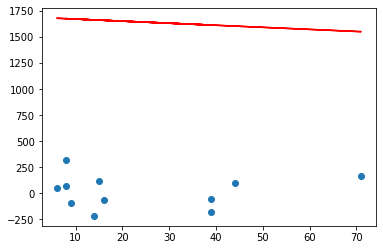

In [56]:
# Выведем график остатков (ошибок) по северному региону
# для этого найдем разницу между y_test - y_pred


# считаем абсолютную ошибку прогноза по северу
mae = mean_absolute_error(y_test, y_pred)    
print(f'mae: {mae}')  

# Рассчитываем разницу между фактической величиной смертности на севере и предсказанной:
diff_s = y_test - y_pred

# Строим графики: прогнозный тренд севера и рассеяние ошибок по их абсолютной величине 
# график стремится к горизонтальной линии, что, видимо, свидетельствует о слабой детерминированности признаков 
plt.scatter(X_test, diff_s)
plt.plot(X_test, y_pred, c='r')